# BLIP 활용한 레이블링

In [54]:
!pip install ultralytics

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


### 2. YOLO와 BLIP 를 다운 받기

In [55]:
from PIL import Image
from ultralytics import YOLO
from transformers.pipelines import pipeline
import torch

In [56]:
device = torch.device("cpu")  # stays on CPU
dtype = torch.float32          # avoid float16

In [57]:
# Load pretrained model
model = YOLO("yolo11n.pt")

100%|██████████| 5.35M/5.35M [00:03<00:00, 1.44MB/s]


https://huggingface.co/docs/transformers/en/model_doc/blip?usage=Pipeline

## YOLO로 객체 분할하기

In [58]:
results = model("test_images/chair1.jpg")
boxes = results[0].boxes.xyxy.cpu().numpy()


image 1/1 /Users/brad/imagegenpoc/test_images/chair1.jpg: 640x288 2 chairs, 1 bed, 258.6ms
Speed: 12.0ms preprocess, 258.6ms inference, 26.0ms postprocess per image at shape (1, 3, 640, 288)


In [59]:
boxes

array([[     104.88,      1205.4,      770.81,      2112.8],
       [     254.33,      980.11,      1076.4,      1467.5],
       [      1.354,      2091.2,      499.96,      2638.7]], dtype=float32)

## 이미지 자르고 BLIP 프롬프트를 통한 레이블링

In [60]:
cropping_pipeline = pipeline(
    task="visual-question-answering",
    model="Salesforce/blip-vqa-base",
    torch_dtype=torch.float32,
    device='cpu'
)
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg"
cropping_pipeline(question="What is the weather in this image?", image=url)

Device set to use cpu


[{'answer': 'snowy'}]

### BLIP 실행 

In [61]:
import matplotlib.pyplot as plt

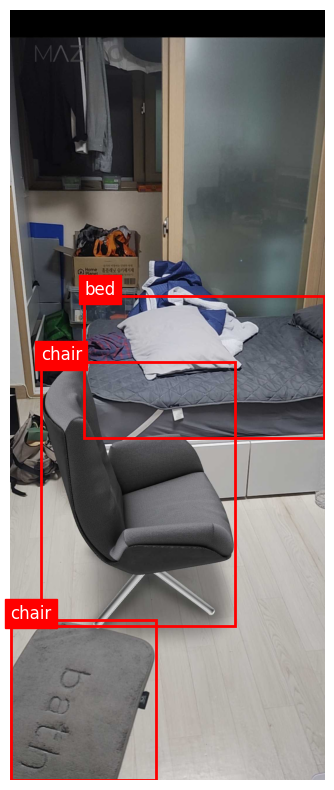

In [62]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

image = Image.open("test_images/chair1.jpg").convert("RGB")

# Create matplotlib figure and axes
fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(image)

for box in boxes:
    # Crop the image
    cropped = image.crop(box)

    # Get BLIP result
    result = cropping_pipeline(
        question="name the furniture in the image",
        image=cropped
    )
    label = result[0].get("answer", "unknown")

    # Draw box and label
    x1, y1, x2, y2 = box
    rect = patches.Rectangle(
        (x1, y1), x2 - x1, y2 - y1,
        linewidth=2, edgecolor="red", facecolor="none"
    )
    ax.add_patch(rect)
    ax.text(x1, y1 - 5, label, fontsize=12, color="white", backgroundcolor="red")

plt.axis("off")
plt.tight_layout()
plt.show()


In [64]:
cropping_pipeline = pipeline(
        task="visual-question-answering",

        model="Salesforce/blip-vqa-base",
        torch_dtype=torch.float16,
        device=0
        )

Device set to use cpu


In [65]:
%du -sh ~/.cache/huggingface/transformers/models--Salesforce--blip-vqa-base

UsageError: Line magic function `%du` not found.
